## Three (most-common) types of colormaps

*  Sequential colormap
  * color encodes a continuous value of a certain range
  * e.g. visualizing neuronal activity from low to high
*  Diverging colormap
  * color encodes a continuous value of a certain range 
  * and should highlight the deviation from a mean-value i.e. the center of the range
  * e.g. visualizing whether and by how much neurons of a population lie above or below the mean activity
*  Qualitative colormap
  * color **does not** encode a continuous value
  * rather it is used to distinguish datapoints or groups of datapoints from each other
  * e.g. visualize which data-points belong to one of n clusters
  
**Rainbow colormaps such as Jet should only be used as a qualitative colormap** as they generally do not fulfill the criteria for a good quantitative colormap. But even for qualitative colormaps there are better alternatives than Jet.


## What a good quantitative colormap should do

* Perceptual uniformity
  * No gradients that are not in the data
  * No dropping of gradients that are actually in the data
  * see example below for more on this
* Works as well as possible for color-vision deficiencies
  * mostly this means avoiding colormaps that contain both red and green
* Works when printed/viewed in grayscale
  * perceptually uniform colormaps will automatically work in grayscale
* Looks aesthetically pleasing
  * of course highly subjective, but it's the reason why we chose not to plot in grayscale in the first place

## Let's look at perceptual uniformity

In [46]:
%matplotlib inline 

import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mpcol
import numpy as np

In [47]:
#parts of the code below are originally from
#https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
#by Jake Vanderplas Oct 16, 2014

def grayify_cmap(cmapname):
    """Return a grayscale version of the colormap"""
    ccmap = plt.cm.get_cmap(cmapname)
    colors = ccmap(np.arange(ccmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return mpcol.LinearSegmentedColormap.from_list(ccmap.name + "_grayscale", colors, ccmap.N)


def compare_colormap(cmapname, image):
    """Show image using the specified colormap, a grayscale
       version of that colormap and using the actual grayscale colormap"""
    cmaps = [plt.cm.get_cmap(cmapname), grayify_cmap(cmapname), plt.cm.gray]
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.subplots_adjust(wspace=0.05)

    for cmap, ax in zip(cmaps, axes):
        ax.axis("off")
        im = ax.imshow(image, cmap=cmap)
        ax.set_title(cmap.name)
        #fig.colorbar(im, ax=ax)
        
def show_colormap(cmap):
    "Show colormap and grayscale version (luminance converted version) of colormap"
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))        

### The problem with Jet

Jet is not peceptually uniform, one consequence of this is that when converting the luminance into a greyscale value, the resulting grayscale colormap does not have a smooth gradient.

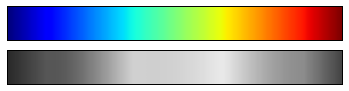

In [48]:
show_colormap('jet')

There is a rainbow colormap that leads to a smooth grayscale gradient...

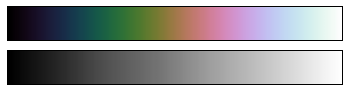

In [49]:
show_colormap('cubehelix')

Below are two examples of perceptually uniform colormaps that also work well for color-vision deficiencies.

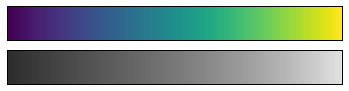

In [50]:
show_colormap('viridis')

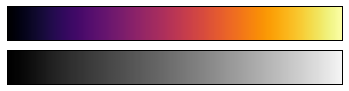

In [51]:
show_colormap('inferno')

## Jet creates artificial structure where there is none and hides structure that is in the data

Besides becoming useless when converted to grayscale, a colormap that is nonuniform in perception can distort the data by creating artificial structure and hiding structure that is actually in the data. Additionally it becomes very hard to intuitively interpret the data.

In [52]:
import matplotlib.mlab as mlab

grad = np.linspace(0, 1, 256)
vert_grad = np.transpose([grad for i in range(256)])
hor_grad = np.zeros((256,256))
for i in range(256):
    if i<122 or i>134:
        hor_grad[:,i] = grad[i]
    else:
        hor_grad[:,i] = 0.485
        
        
X, Y = np.meshgrid(grad, grad)
gauss = mlab.bivariate_normal(X, Y, 0.25, 0.25, 0.5, 0.5) #sigma_x, sigma_y, mu_x, mu_y       
gauss = gauss / max(np.ravel(gauss)) #make sure that values are between 0 and 1

image = np.hstack((vert_grad,hor_grad, gauss))

The figure below shows relatively simple data, but it is hard to interpret on a quick glance with a rainbow-colormap. Looking at the figure below, how does the data actually look like - are there some waves, sinusoids, etc.?

(-0.5, 767.5, 255.5, -0.5)

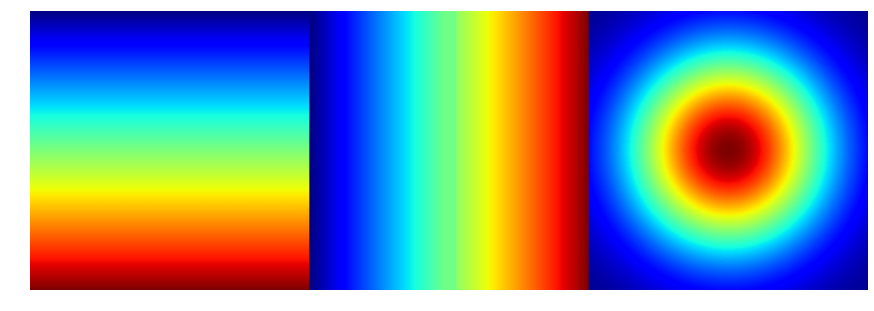

In [53]:
f = plt.figure(figsize=(15, 5))
plt.imshow(image, cmap = plt.cm.get_cmap('jet'))
plt.gca().axis("off")

Well... plotting it in grayscale, allows to see what's going on much more intuitively! Also notice that the gradient in the left panel is smooth (which is not immediately obvious from the jet-version of the image). Additionally, the gradient of the middle panel is non-smooth - a detail that can easily be overlooked with jet (humans are particularly insensitive to details in the blue-greenish region of jet).

(-0.5, 767.5, 255.5, -0.5)

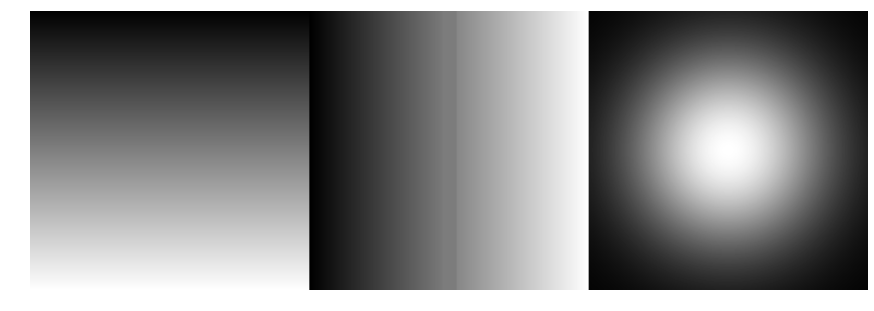

In [54]:
f = plt.figure(figsize=(15, 5))
plt.imshow(image, cmap = plt.cm.get_cmap('gray'))
plt.gca().axis("off")

Here's the rainbow colormap with a better luminance profile. At least the non-smooth gradient in the middle panel is now clearly visible. But it's still hard to judge whether the data is smooth or hase some sort of wave-pattern.

(-0.5, 767.5, 255.5, -0.5)

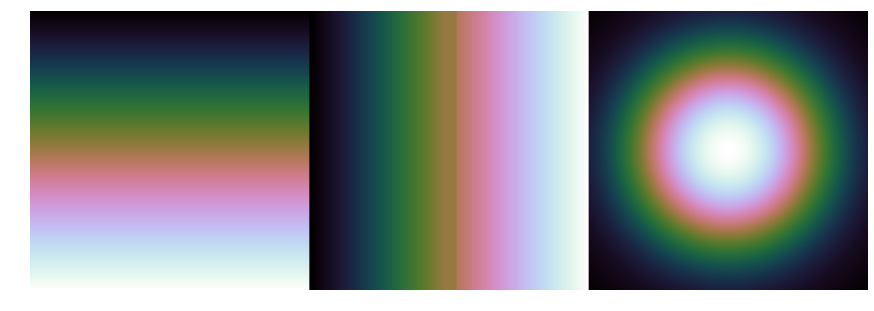

In [55]:
f = plt.figure(figsize=(15, 5))
plt.imshow(image, cmap = plt.cm.get_cmap('cubehelix'))
plt.gca().axis("off")

In contrast, the two perceptually uniform color-maps allow for a very good, quick judgement of the data that is as good as viewing the grayscale version - no artificial structure is introduced, no actual structure is hidden.

(-0.5, 767.5, 255.5, -0.5)

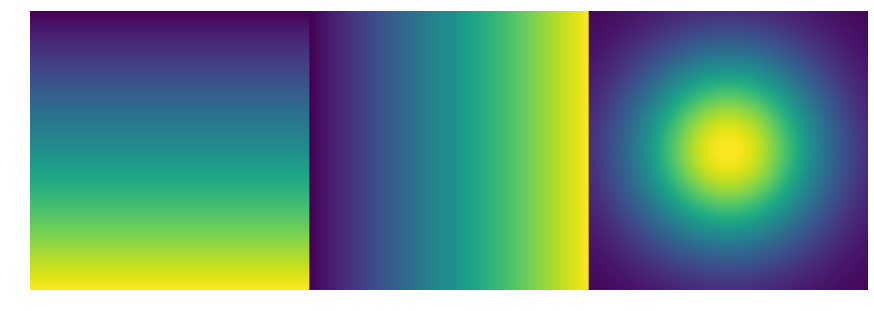

In [56]:
f = plt.figure(figsize=(15, 5))
plt.imshow(image, cmap = plt.cm.get_cmap('viridis'))
plt.gca().axis("off")

(-0.5, 767.5, 255.5, -0.5)

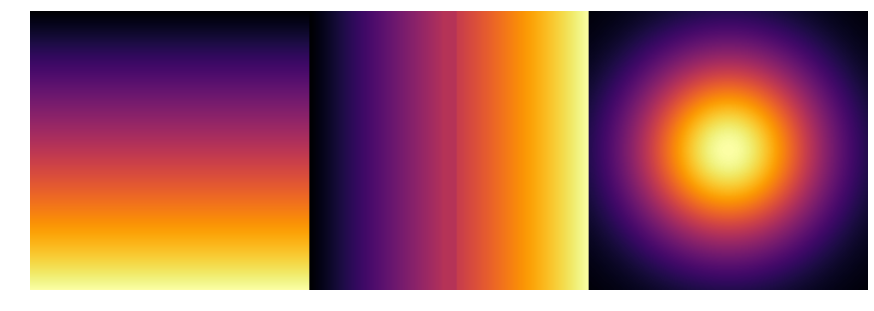

In [57]:
f = plt.figure(figsize=(15, 5))
plt.imshow(image, cmap = plt.cm.get_cmap('inferno'))
plt.gca().axis("off")

## Making it more obvious...

The original idea to rapidly judge the quality of a colormap by coloring a grayscale image of a human face is from (kudos for getting a paper with such a great title published): 

**Rogowitz, Bernice E., and Alan D. Kalvin. The "Which Blair Project": a quick visual method for evaluating perceptual color maps. Visualization, 2001. VIS'01. Proceedings. IEEE, 2001.**

The argument is that humans are very good at detecting faces and also at detecting unnatural details in faces (such as strange luminance profiles). If a colormap produces an unnatural looking face, imagine what it might do to data that you're much less familiar with.


In the plots below you can see three panels:
  * Left: image colored with the colormap
  * Middle: colored image converted to a grayscale image using the luminance values
  * Right: actual grayscale image

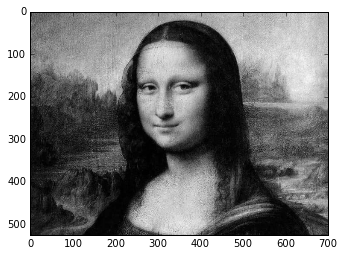

In [58]:
image = mpimg.imread("mona_gray.png")

plt.gray()
plt.imshow(image)

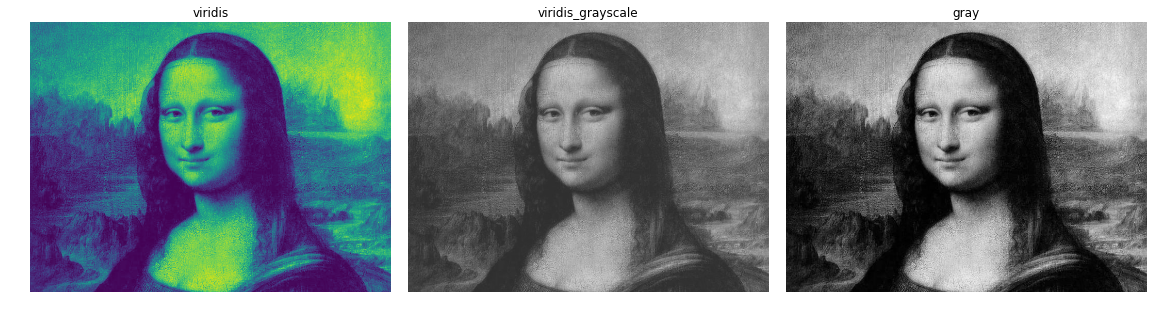

In [59]:
compare_colormap('viridis', image)  

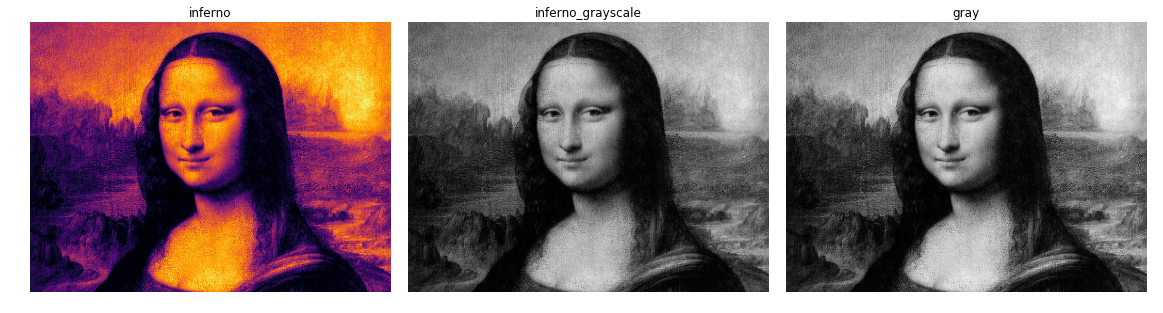

In [60]:
compare_colormap('inferno', image)  

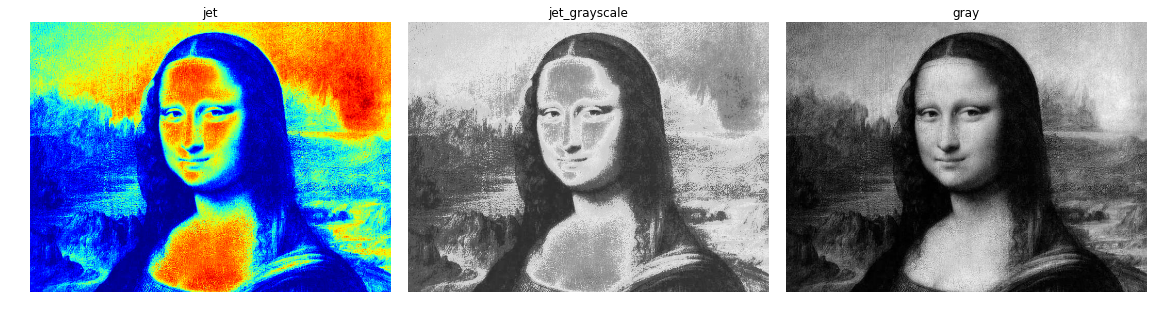

In [61]:
compare_colormap('jet', image)    

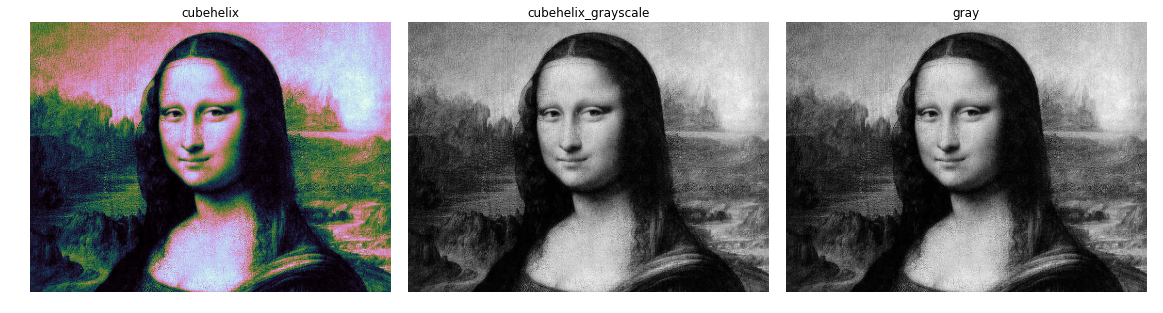

In [62]:
compare_colormap('cubehelix', image)  

## Is it really that bad?

There is a study that found that exposed (future) medical doctors to the same data (for detecting coronary artery disease) under different colormaps. They found that the participants preferred a rainbow colormap (which has become the standard in the medical literature and is also the default-option of most software that they're using). Additionally the study found that the detection accuracy was higher when using a different (non-rainbow) colormap. Especially when preparing and visualizing data for non-data-scientists that will use the visualization for a quick visual judgement of the data, it can have severe consequences when using a bad colormap.
Here's the study:
  > Borkin, Michelle A., et al. "Evaluation of artery visualizations for heart disease diagnosis." Visualization and Computer Graphics, IEEE Transactions on 17.12 (2011): 2479-2488.
  
There are also open letters to scientific communities and to journals to discourage or even ban the use of rainbow colormaps as poor visual communication should not be tolerated, particularly because better alternatives are readily available:

  > https://www.ncas.ac.uk/index.php/en/18-news/2168-the-end-of-the-rainbow
  > http://www.nature.com/nature/journal/v519/n7543/full/519291d.html
  

A nice overview of all the issues and futher reading can be found here:
  > http://www.mathworks.com/tagteam/81137_92238v00_RainbowColorMap_57312.pdf
  
And finally, here's a nice talk from SciPy 2015 of the designers of Matplotlib's new colormaps:
  > https://www.youtube.com/watch?v=xAoljeRJ3lU

## Ok, I'm convinced - how can I find a good qualitative colormap?

For sequential colormaps there are many tools on the internet that help you design a colormap.  
If you're using Python's Matplotlib you can use any of:
 * viridis (new default in version 1.5+)
 * inferno
 * plasma
 * magma
 
If you're using Matlab (version 2014b and later), Jet has finally been replaced by Parula as the new default. Parula is not as good as the colormaps that Matplotlib offers but it is reasonably homogeneous in perception (and a massive improvement over using Jet). 


For diverging colormaps make sure that the gradient (in luminance) is the same in both directions away from the mean. Typically diverging colormaps are brightest in the center and darkest at both ends of the scale. In Python try for instance:

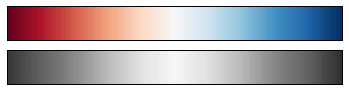

In [63]:
show_colormap('RdBu')

More specialized colormaps for particular applications exist (for instance for plotting topographic data, weather and climate data, astronomic data, etc.) - probably you can even find publications underlying the design of these colormaps. For some colormaps it makes sense that they are linear up to a saturation point, for others it makes sense that they have some exponential or logarithmic characteristics. Think about how your data translates most appropriately into a luminance value and find a colormap that works like you want it to!